## DSCI 100 Group Project Proposal ##

By: Alessandra Lu, Ruby Suo, Han Wei, Alan Wu

#### Introduction ####
The data illustrates the performance of Portuguese secondary school students that are from two different schools. Important information such as students' final grades, family background and time devoted to study are included in the data. There are two datasets, each for one of the two subjects, (Mathematics (mat) and Portuguese language (por). 
Identify and describe the dataset that will be used to answer the question
We will try to find the impacts of two factors on students' final grade in Mathematics, and these two factors are students' study time and age. The dataset used is https://raw.githubusercontent.com/alan-w-u/dsci-100-group-project/main/student-mat.csv which includes the data for Mathematics.

#### Preliminary Exploratory Data Analysis ####

In [1]:
# Import libraries

library(tidyverse)
library(repr)
library(tidymodels)
library(dbplyr)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# Load data from the web

url <- "https://raw.githubusercontent.com/alan-w-u/dsci-100-group-project/main/student-mat.csv"
data_raw <- read_delim(url, delim = ";")
data_raw

Rows: 395 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
MS,M,21,R,GT3,T,1,1,other,other,⋯,5,5,3,3,3,3,3,10,8,7
MS,M,18,R,LE3,T,3,2,services,other,⋯,4,4,1,3,4,5,0,11,12,10
MS,M,19,U,LE3,T,1,1,other,at_home,⋯,3,2,3,3,3,5,5,8,9,9


In [27]:
# Clean and wrangle the data

age_range = c(15, 16, 17, 18)

data <- data_raw |>
    filter(age %in% age_range & G3 != 0) |> # Filter for student age that is normatively in secondary school and final grade is 0
    select(age, studytime, freetime, G3) |>
    rename(finalgrade = G3) |>
    mutate(finalgrade = finalgrade * 5)
data

age,studytime,freetime,finalgrade
<dbl>,<dbl>,<dbl>,<dbl>
18,2,3,30
17,2,3,30
15,2,3,50
⋮,⋮,⋮,⋮
18,2,3,40
17,1,4,80
18,1,4,50


In [28]:
# Split training and testing data

set.seed(3)

data_split <- initial_split(data, prop = 0.7, strata = finalgrade)
data_training <- training(data_split)
data_testing <- testing(data_split)

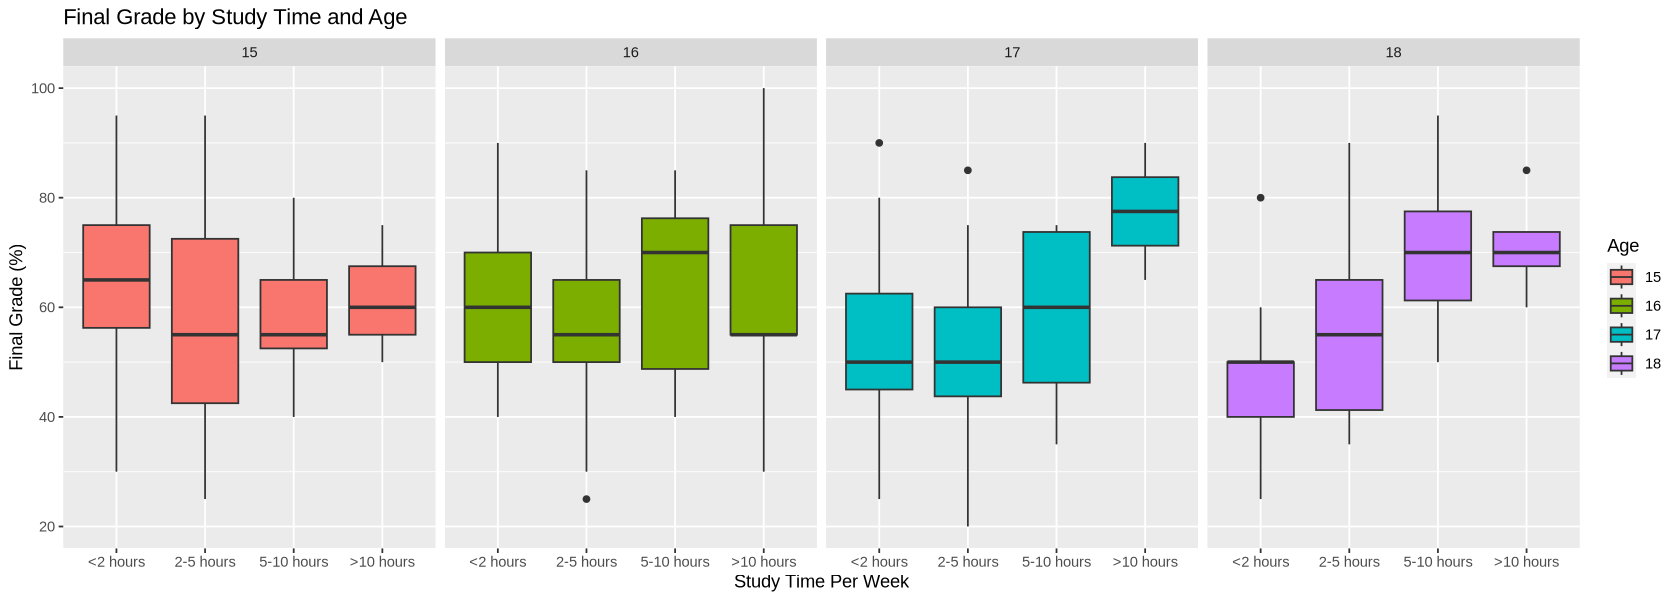

In [29]:
# Visualize data

options(repr.plot.height = 5, repr.plot.width = 14)

studytime_values <- c("1", "2", "3", "4")
studytime_meanings <- c("<2 hours", "2-5 hours", "5-10 hours", ">10 hours")

data_plot <- data_training |>
    ggplot(aes(x = as_factor(studytime), y = finalgrade, fill = as_factor(age))) +
    geom_boxplot() +
    labs(x = "Study Time Per Week", y = "Final Grade (%)", fill = "Age") +
    ggtitle("Final Grade by Study Time and Age") +
    facet_grid(cols = vars(as_factor(age))) +
    scale_x_discrete(breaks = studytime_values, labels = studytime_meanings)
data_plot

#### Methods ####

The variables we will use from the data set are:
- age
- study time
- free time

#### Expected Outcomes and Significance ####

We expect that study time becomes an important factor of final grade. The next several factors should be age, absences and extra paid classes in subject matter. The other factors listed above might also be influential, but they are expected to affect less on final grades.